📊 Dataset created
X shape: (100, 3)
y shape: (100,)
True weights: [ 3.  -2.   1.5]
True bias: 5.0


✅Parameters initialized | Shape of w : (3,)
❇️Starting training for 1000 epochs
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅Forward pass computed!
✅For

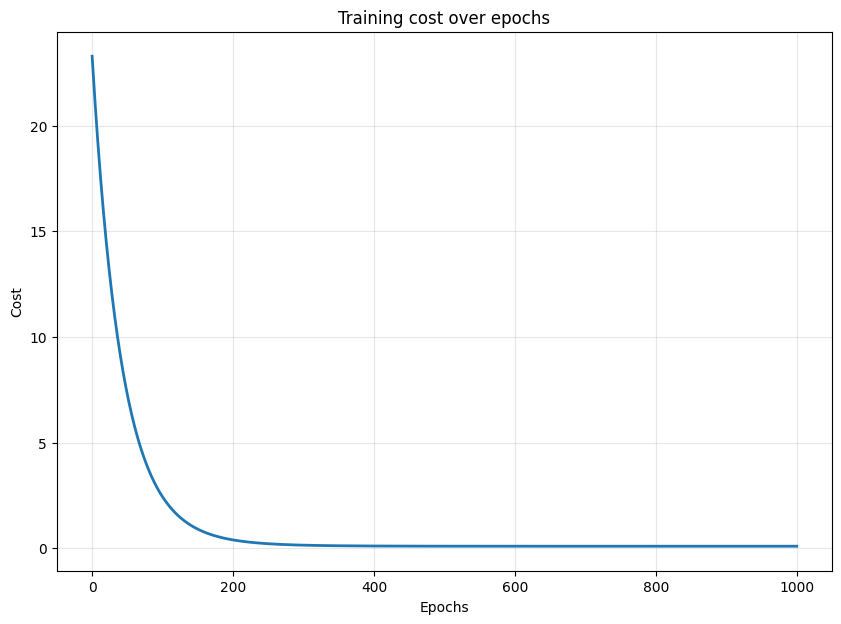


Comparison with sklearn:
Our model weights: [ 2.95813239 -2.02583652  1.44544368]
sklearn weights:   [ 2.96116836 -2.02498178  1.44620334]

Our model bias: 5.0567
sklearn bias:   5.0564


In [32]:
'''
Develop the Linear Regression Model From Scratch
Parameters :
    - w : weights
    - b : bias
    - lr : learning rate
    - epochs : number of iterations
    - X : Dataset (excluding y)
    - y: Target output

    Workflow : 
        - Initialize weights and bias
        - Compute forward pass 
            🟰  y_pred = X @ w + b

        - Compute cost
            🟰  ⅟ (2 * n_samples) * ∑(y_pred - y)²

        - Compute gradient
            🟰  ∂/∂w = ⅟ (n_samples) * (X @ (y_pred - y))
            🟰  ∂/∂b = ⅟ (n_samples) * ∑((y_pred -y))

        - Compute gradient descent
            🟰 w -= learning_rate * ∂/∂w
            🟰 b -= learning_rate * ∂/∂b
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegressionFromScratch():
    def __init__(self,lr: float, epochs: int):
        '''Initialize the model
        
        Args: 
            lr : Learning rate
            epochs: Number of iterations'''
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        self.cost_history = []

    def _initialize_w_b_(self,n_features: int) -> None:
        '''Initialize the weights and bias
        
        Args:
            n_features: Number of columns in the dataset
        '''
        self.w = np.zeros(n_features)
        self.b = 0.0
        print(f'✅Parameters initialized | Shape of w : {self.w.shape}')

    def _compute_forward_pass_(self,X: np.ndarray) -> np.ndarray:
        '''Compute forward pass
        
        Args: 
            X : Feature matrix (n_samples, n_featues)
            
        Returns:
            y_pred : Prediction matrix
        '''
        y_pred = X @ self.w + self.b
        print('✅Forward pass computed!')
        return y_pred
    
    def _compute_cost_(self,y: np.ndarray,y_pred: np.ndarray) -> np.ndarray:
        '''Compute the cost function
        
        Args:
            y: True labels
            n_samples: Number of training examples
            
        Returns:
            cost: MSE cost (scalar)'''
        n_samples = len(y)
        cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
        return cost
    
    def _compute_gradient_(self,X: np.ndarray,y: np.ndarray,
                            y_pred: np.ndarray) -> tuple[np.ndarray,float]:
        '''Compute the gradient
        
        Args: 
            x : feature matrix
            y : True labels
            y_pred: predicted labels
            
        '''
        n_samples = X.shape[0]

        error = y_pred - y
        dw = (1 / n_samples) * np.dot(X.T,error) 
        db = (1 / n_samples) * np.sum(error)

        return dw, db
    
    def _gradient_descent_(self,dw: np.ndarray, db: float) -> None:
        '''Compute gradient descent - Update weights and bias
        
        Args: 
            dw : Gradient of weights
            db : Gradient of bias
        '''
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def _fit_(self,X : pd.DataFrame | np.ndarray, 
            y : np.ndarray | pd.Series) -> 'LinearRegressionFromScratch':
        '''Train the linear regression model
        
        Args:
            X : feature matrix
            y : True labels
        Returns:
            self.trained_model    
        '''
        # convert pandas dataframes to ndarray if needed
        if isinstance(X,pd.DataFrame):
            X = X.values
        if isinstance(y,pd.Series):
            y = y.values

        # validate inputs
        if X.shape[0] != y.shape[0]:
            raise ValueError
        (f'X and y must have the same number of samples: {X.shape[0]} != {y.shape[0]}')

        n_samples, n_features = X.shape
        
        self._initialize_w_b_(n_features)
        print(f'❇️Starting training for {self.epochs} epochs')

        for epoch in range(self.epochs):
            # step 1: compute forward pass
            y_pred = self._compute_forward_pass_(X)
            # step 2: compute cost
            cost = self._compute_cost_(y,y_pred)
            self.cost_history.append(cost)
            # step 3: compute gradient
            dw, db = self._compute_gradient_(X, y, y_pred)
            # step 4 : Perform gradient descent
            self._gradient_descent_(dw, db)
        
        # print progress after every 100 epochs
            if (epoch + 1) / 100 == 0:
                print(f'🎯epochs {epoch+ 1}/{self.epochs} - Cost: {cost:.4f}')
        
        print(f'❇️Training complete: Final Cost = {self.cost_history[-1]}')
        return self
    
    def _predict_(self, X: pd.DataFrame | np.ndarray) -> np.ndarray:
        '''Make predictions on new data
        
        Args: 
            X : feature matrix
        Returns:
            y_pred : Predicted label
        '''
        if self.w is None or self.b is None:
            raise ValueError(f'Weights and bias not trained yet. Call "_fit_" function first')
        
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        y_pred = X  @ self.w + self.b
        return y_pred
    
    def plot_cost_history(self) -> None:
        'Plot the cost function over epochs'
        if not self.cost_history:
            print('No training cost history')
            return
        
        plt.figure(figsize=(10,7))
        plt.plot(self.cost_history, linewidth=2)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Training cost over epochs')
        plt.grid(True, alpha=0.3)
        plt.show()

    def get_parameters(self) -> None:
        '''Get learned parameters
        
        Returns: 
            Dictionary containing learned parameters
        '''
        return {
            'weight' : self.w,
            'bias' : self.b,
            'final_cost': self.cost_history[-1] if self.cost_history else None
        }
    
if __name__ == '__main__':
    # Generate synthetic data
        np.random.seed(42)
        n_samples = 100
        n_features = 3
        
        # True parameters (what we're trying to learn)
        true_w = np.array([3.0, -2.0, 1.5])
        true_b = 5.0
        
        # Generate features
        X = np.random.randn(n_samples, n_features)
        
        # Generate target with some noise
        y = X @ true_w + true_b + np.random.randn(n_samples) * 0.5
        
        print('📊 Dataset created')
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        print(f'True weights: {true_w}')
        print(f'True bias: {true_b}')
        print('\n' + '='*50 + '\n')
        
        # Train model
        model = LinearRegressionFromScratch(lr=0.01, epochs=1000)
        model._fit_(X, y)
        
        print('\n' + '='*50 + '\n')
        
        # Get learned parameters
        params = model.get_parameters()
        print('📈 Learned parameters:')
        print(f'Weights: {params["weight"]}')
        print(f'Bias: {params["bias"]:.4f}')
        print(f'Final cost: {params["final_cost"]:.4f}')
        
        # Compare with true parameters
        print('\n📊 Comparison with true parameters:')
        print(f'Weight error: {np.abs(params["weight"] - true_w)}')
        print(f'Bias error: {np.abs(params["bias"] - true_b):.4f}')
        
        # Make predictions
        y_pred = model._predict_(X)
        
        # Compute R² score
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        print(f'\n📊 R² Score: {r2_score:.4f}')
        
        # Plot cost history
        model.plot_cost_history()
        
        # Compare with sklearn
        print('\n' + '='*50)
        print('Comparison with sklearn:')
        print('='*50)
        
        from sklearn.linear_model import LinearRegression
        sklearn_model = LinearRegression()
        sklearn_model.fit(X, y)
        
        print(f'Our model weights: {params["weight"]}')
        print(f'sklearn weights:   {sklearn_model.coef_}')
        print(f'\nOur model bias: {params["bias"]:.4f}')
        print(f'sklearn bias:   {sklearn_model.intercept_:.4f}')